In [1]:
# Import necessary libraries
import numpy as np                # For numerical operations
import pandas as pd               # For data manipulation and analysis
import matplotlib.pyplot as plt   # For data visualization
import seaborn as sns             # For advanced visualization
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
data.shape

(1460, 81)

Electrical         1
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
BsmtExposure      38
BsmtFinType2      38
GarageCond        81
GarageQual        81
GarageFinish      81
GarageYrBlt       81
GarageType        81
LotFrontage      259
FireplaceQu      690
MasVnrType       872
Fence           1179
Alley           1369
MiscFeature     1406
PoolQC          1453
dtype: int64


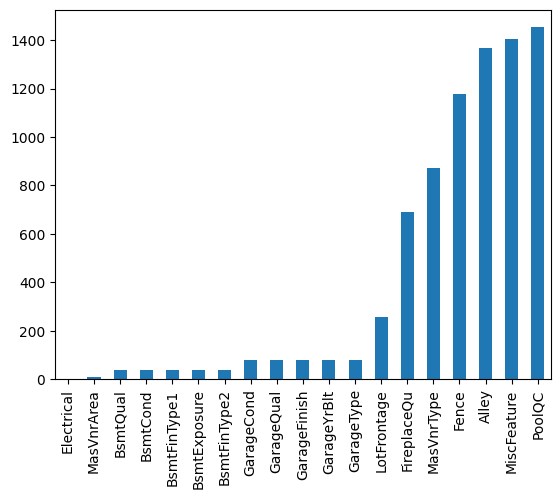

In [4]:
# Handle missing values
missing = data.isnull().sum()     # Count the missing values in each column
missing = missing[missing > 0]    # Filter columns with missing values
missing.sort_values(inplace=True) # Sort columns by the number of missing values
missing.plot.bar()                # Visualize missing values as a bar chart
print(missing) 

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

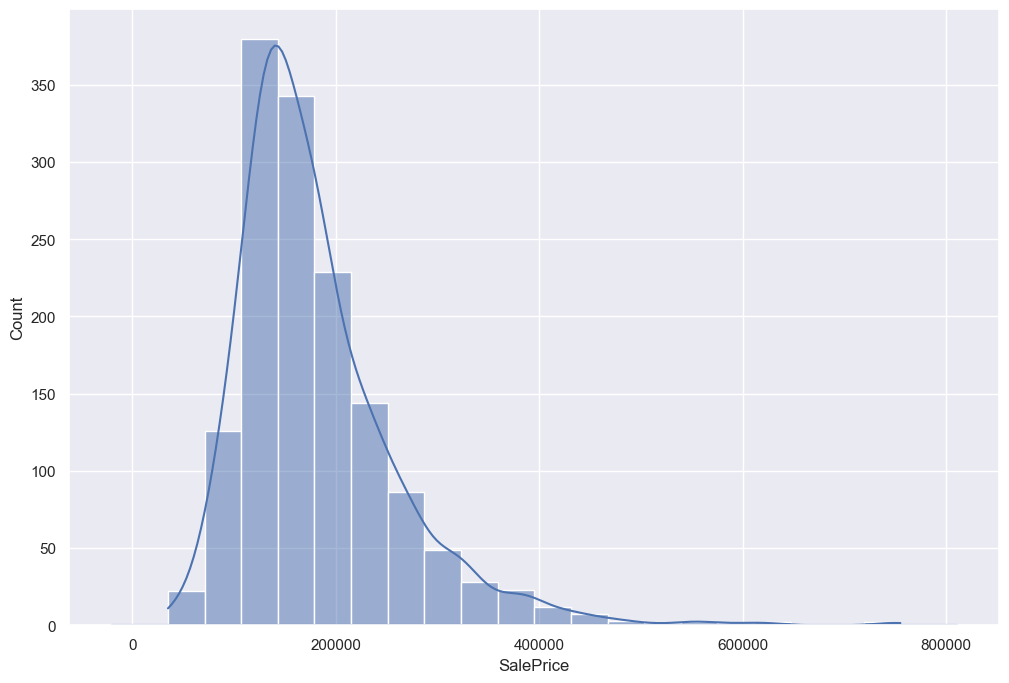

In [5]:
# Visualize the target variable 'SalePrice'
sns.set_theme(rc={'figure.figsize': (12, 8)}) # Set a larger figure size for plots
sns.histplot(data['SalePrice'], kde=True, bins=20) # Plot a histogram with KDE (smoothed curve)
sns.kdeplot(data['SalePrice'])    # Overlay a KDE plot for better visualization
data['SalePrice'].describe()      # Display summary statistics of 'SalePrice'


In [6]:
# Separate numeric and categorical features

# Select numerical columns
numeric_features = data.select_dtypes(include=[np.number])
numeric_features.columns

 # Select categorical columns
categorical_features = data.select_dtypes(include=[object])
categorical_features.columns

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [7]:
# Calculate correlations of numerical features with 'SalePrice'
correlation = numeric_features.corr() # Compute correlation matrix

print(correlation["SalePrice"].sort_values(ascending=False)) # Sort features by correlation with 'SalePrice'


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

<Axes: title={'center': 'Correlation of Numeric Features with SalePrice'}>

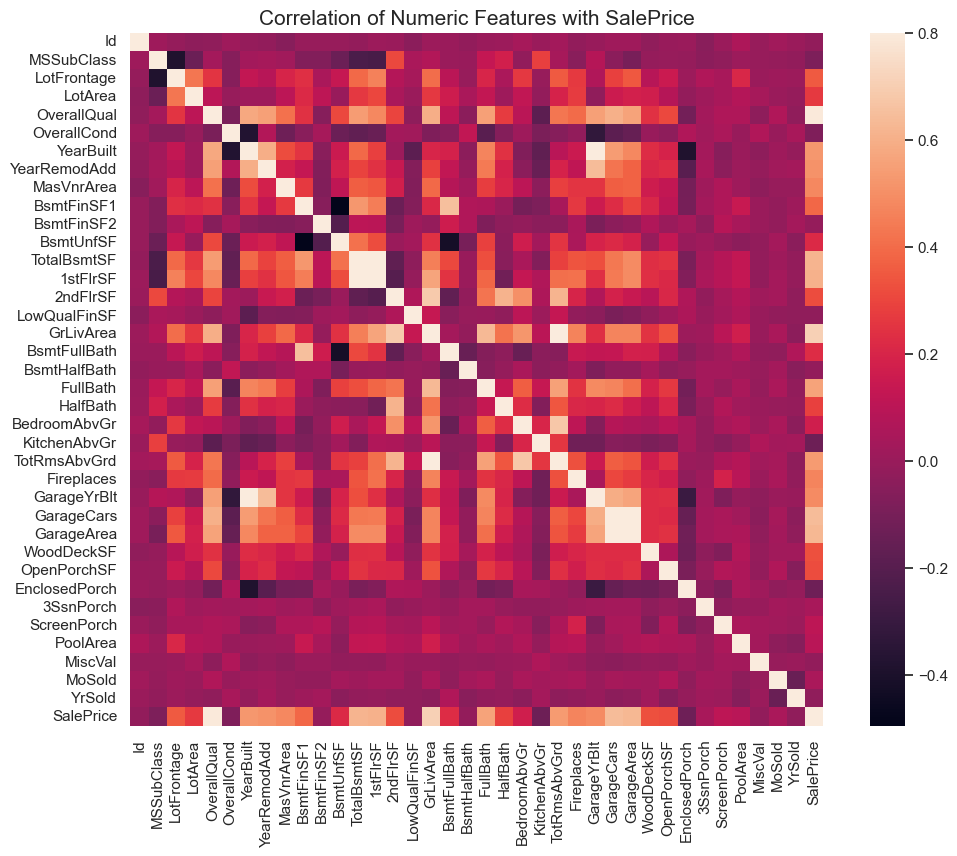

In [8]:
# Visualize correlations as a heatmap

# Create a large subplot
f, ax = plt.subplots(figsize=(12, 9))

# Add a title
plt.title('Correlation of Numeric Features with SalePrice', y=1, size=15)

# Create a heatmap with correlations
sns.heatmap(correlation, square=True, vmax=0.8)

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd'],
      dtype='object')


<Axes: >

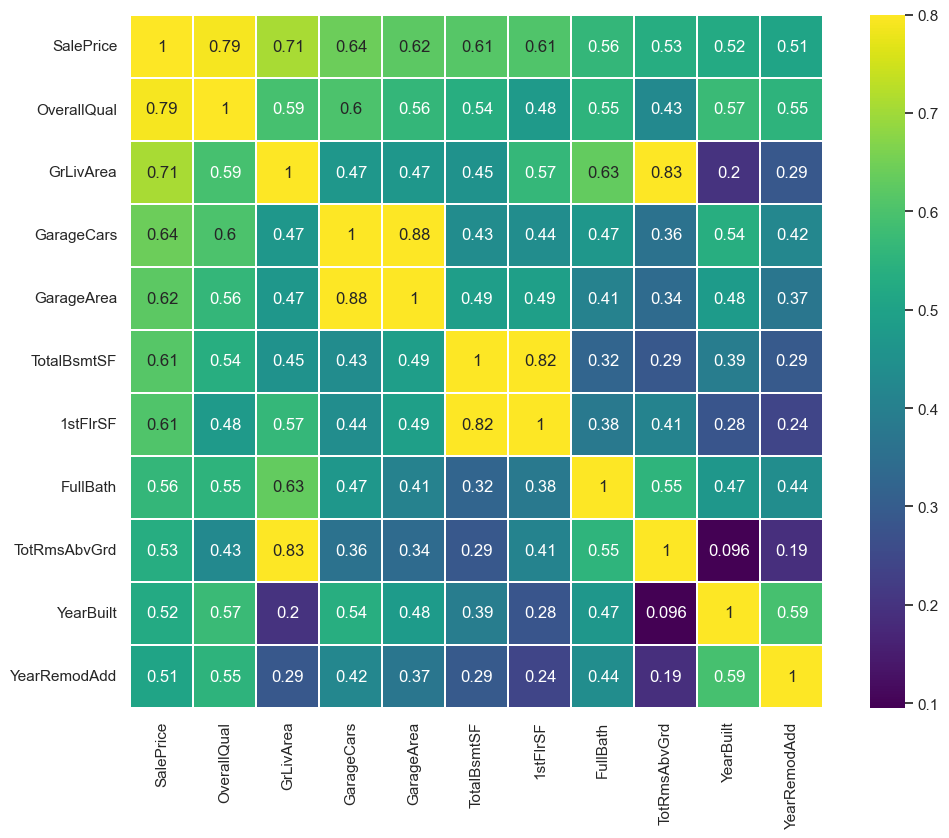

In [9]:
# Select top 11 features most correlated with 'SalePrice'
k = 11
cols = correlation.nlargest(k, 'SalePrice')['SalePrice'].index # Find top features
print(cols)

cm = np.corrcoef(data[cols].values.T) # Compute the correlation matrix of these features
f, ax = plt.subplots(figsize=(12, 9)) # Create another large subplot
sns.heatmap(cm, vmax=0.8, linewidths=0.01, square=True, annot=True, # Visualize as heatmap
xticklabels=cols.values, yticklabels=cols.values, cmap='viridis')

<Axes: xlabel='GarageCars', ylabel='SalePrice'>

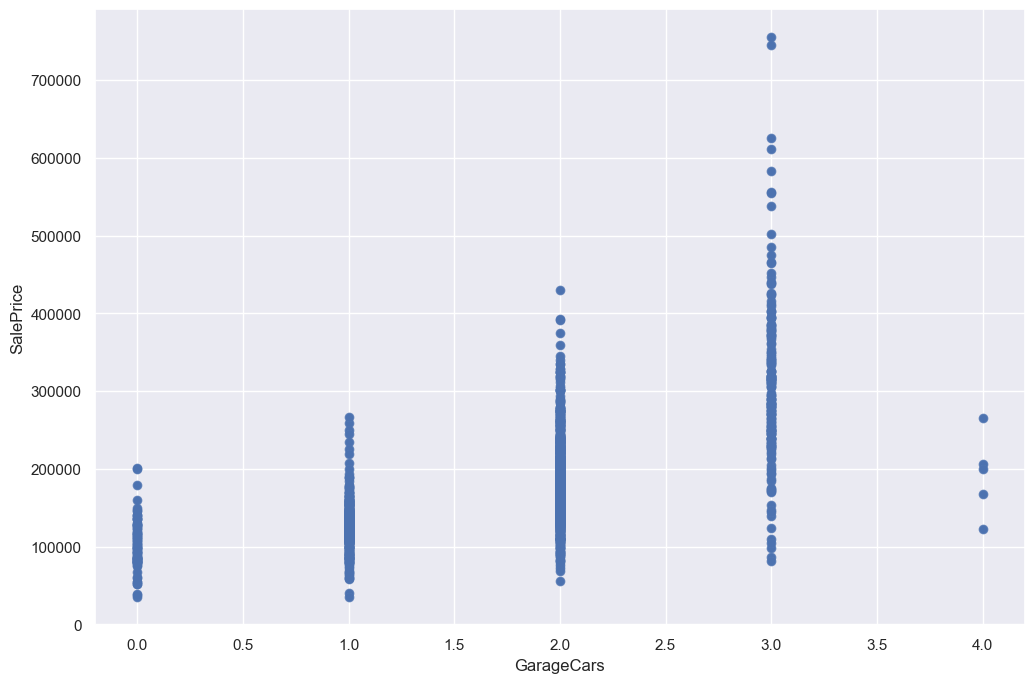

In [10]:
# Scatter plots of highly correlated features with 'SalePrice'
sns.scatterplot(x="GarageCars", y="SalePrice", data=data) # Scatter plot of GarageCars vs SalePrice
sns.regplot(x="GarageCars", y="SalePrice", data=data, scatter=True, fit_reg=False)


<Axes: xlabel='WoodDeckSF', ylabel='SalePrice'>

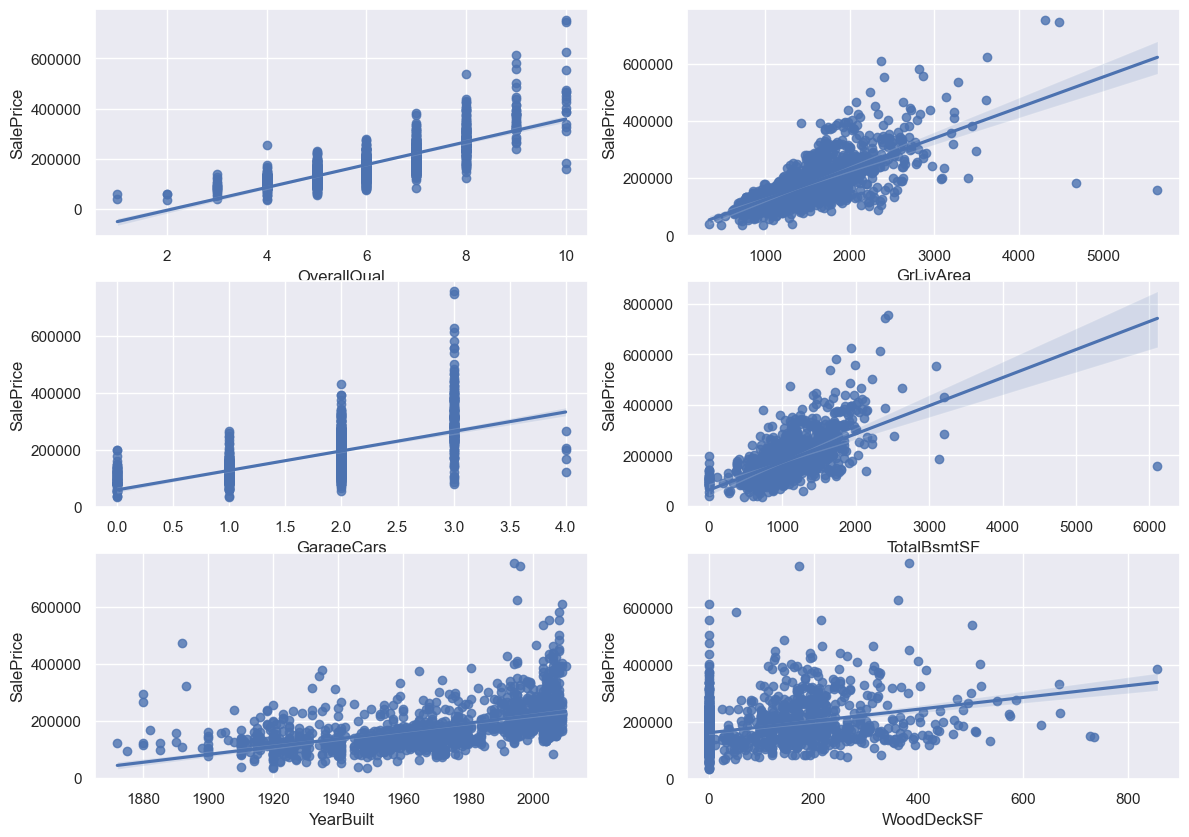

In [11]:
# Multiple scatter plots for other correlated features
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows=3, ncols=2, figsize=(14, 10))
sns.regplot(x="OverallQual", y="SalePrice", data=data, scatter=True, fit_reg=True, ax=ax1)
sns.regplot(x="GrLivArea", y="SalePrice", data=data, scatter=True, fit_reg=True, ax=ax2)
sns.regplot(x="GarageCars", y="SalePrice", data=data, scatter=True, fit_reg=True, ax=ax3)
sns.regplot(x="TotalBsmtSF", y="SalePrice", data=data, scatter=True, fit_reg=True, ax=ax4)
sns.regplot(x="YearBuilt", y="SalePrice", data=data, scatter=True, fit_reg=True, ax=ax5)
sns.regplot(x="WoodDeckSF", y="SalePrice", data=data, scatter=True, fit_reg=True, ax=ax6)

<Axes: xlabel='SalePrice'>

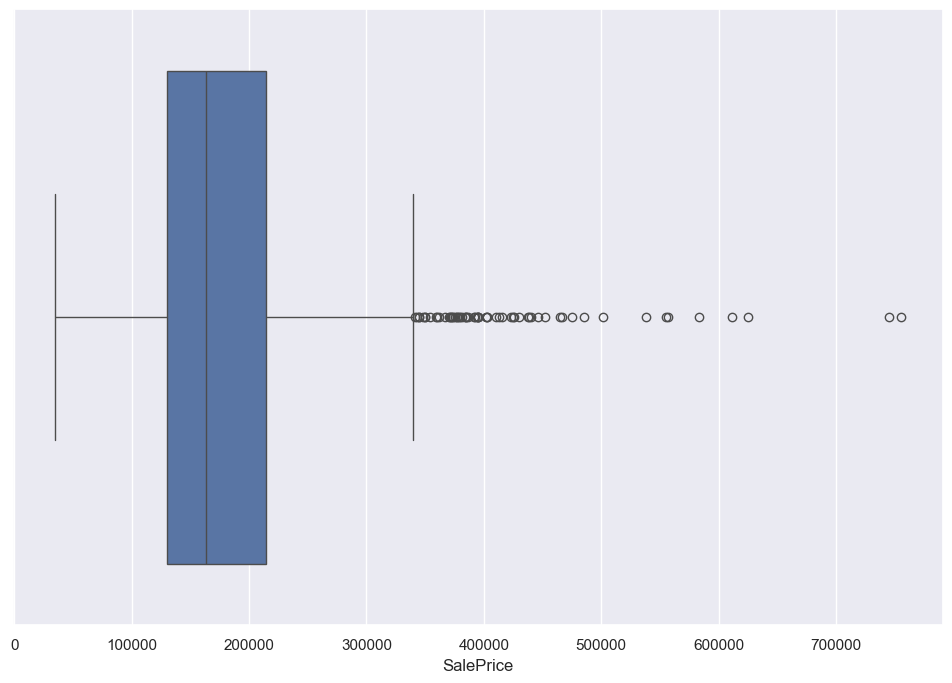

In [12]:
# Boxplot for SalePrice
sns.boxplot(x=data["SalePrice"]) # Create a boxplot to visualize outliers in SalePrice

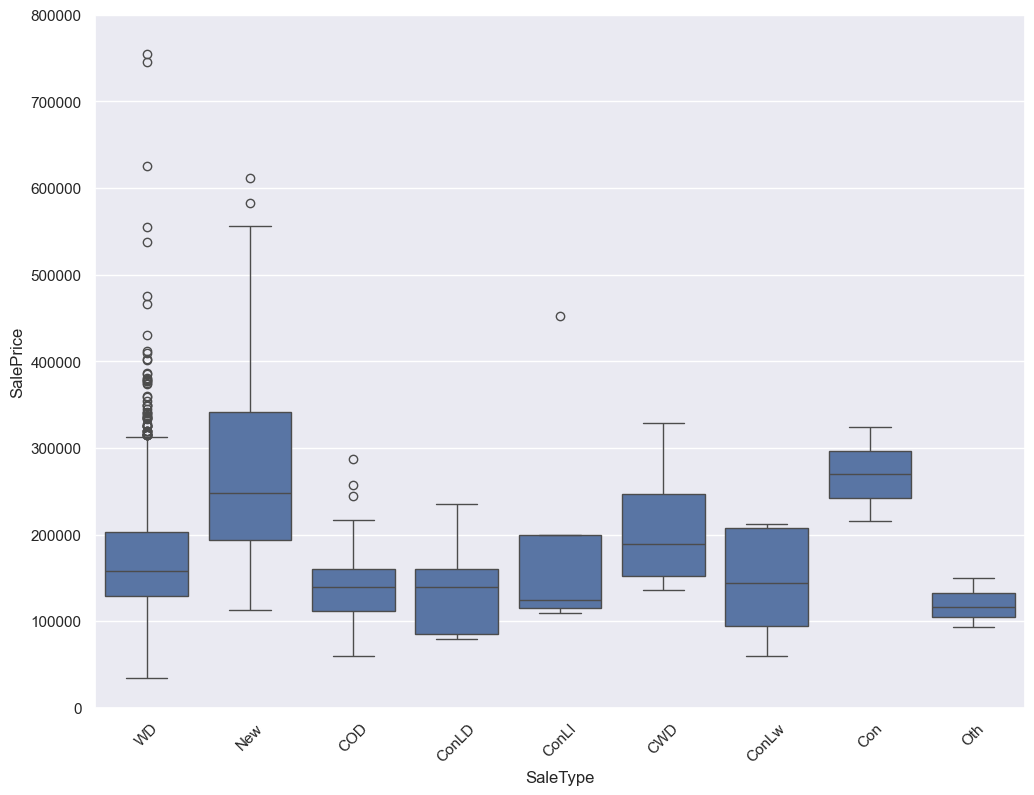

In [13]:
# Boxplot to analyze SalePrice based on SaleType
f, ax = plt.subplots(figsize=(12, 9))
fig = sns.boxplot(x="SaleType", y="SalePrice", data=data) # Boxplot of SaleType vs SalePrice
fig.axis(ymin=0, ymax=800000) # Set y-axis limits
xt = plt.xticks(rotation=45) # Rotate x-axis labels for readabilit

(-0.5, 9.5, 0.0, 800000.0)

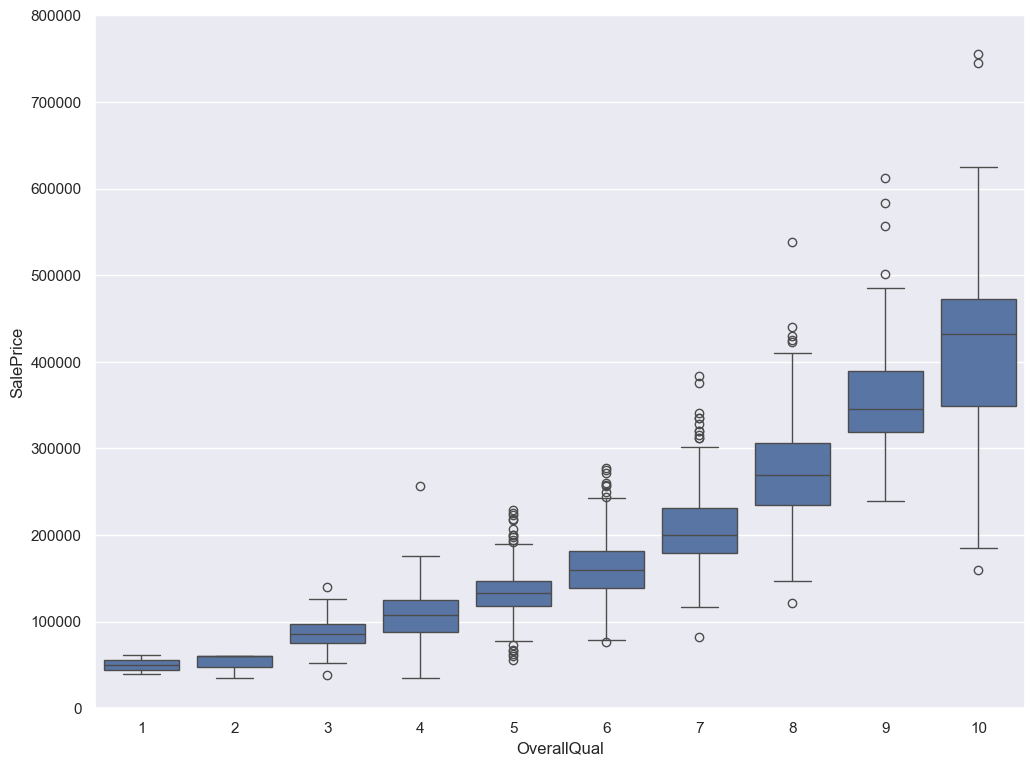

In [14]:
# Boxplot to analyze SalePrice based on OverallQual
f, ax = plt.subplots(figsize=(12, 9))
fig = sns.boxplot(x="OverallQual", y="SalePrice", data=data) # Boxplot of OverallQual vs SalePrice
fig.axis(ymin=0, ymax=800000) # Set y-axis limits

(1460, 81)

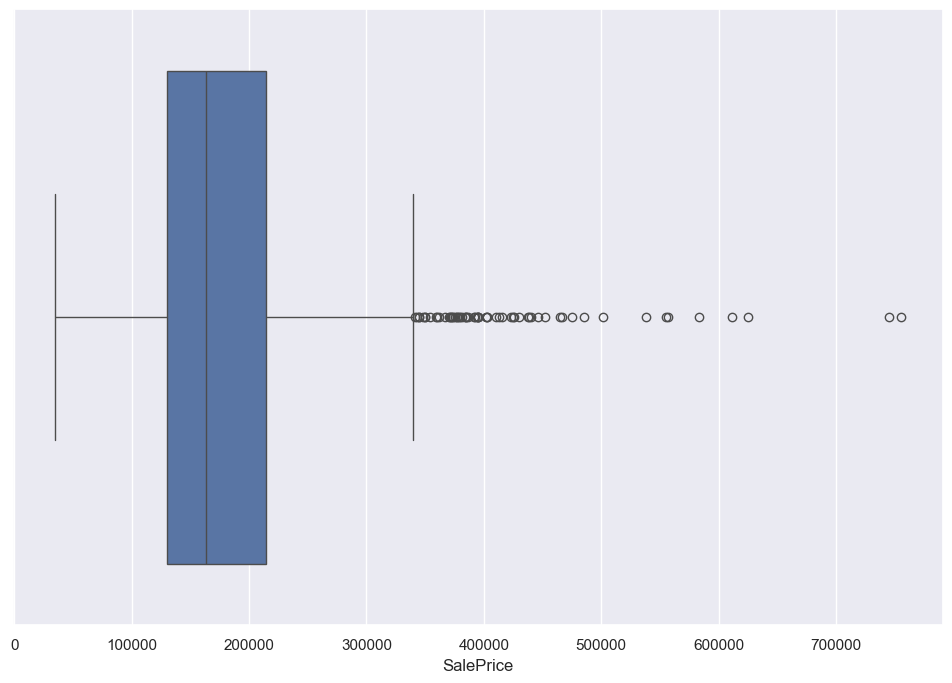

In [15]:
# Remove outliers from SalePrice
sns.boxplot(x=data["SalePrice"]) # Visualize outliers using a boxplot
data.shape                     # Check the shape of data before removing outliers

In [16]:
first_quartile = data["SalePrice"].quantile(0.25) # Calculate Q1
third_quartile = data["SalePrice"].quantile(0.75) # Calculate Q3
IQR = third_quartile - first_quartile             # Compute the interquartile range
new_boundary = third_quartile + 3 * IQR           # Define a new upper boundary for outliers
data.drop(data[data["SalePrice"] > new_boundary].index, axis=0, inplace=True) # Remove outliers

In [17]:
# Check the shape of data after removing outliers
data.shape

(1448, 81)

<Axes: xlabel='SalePrice'>

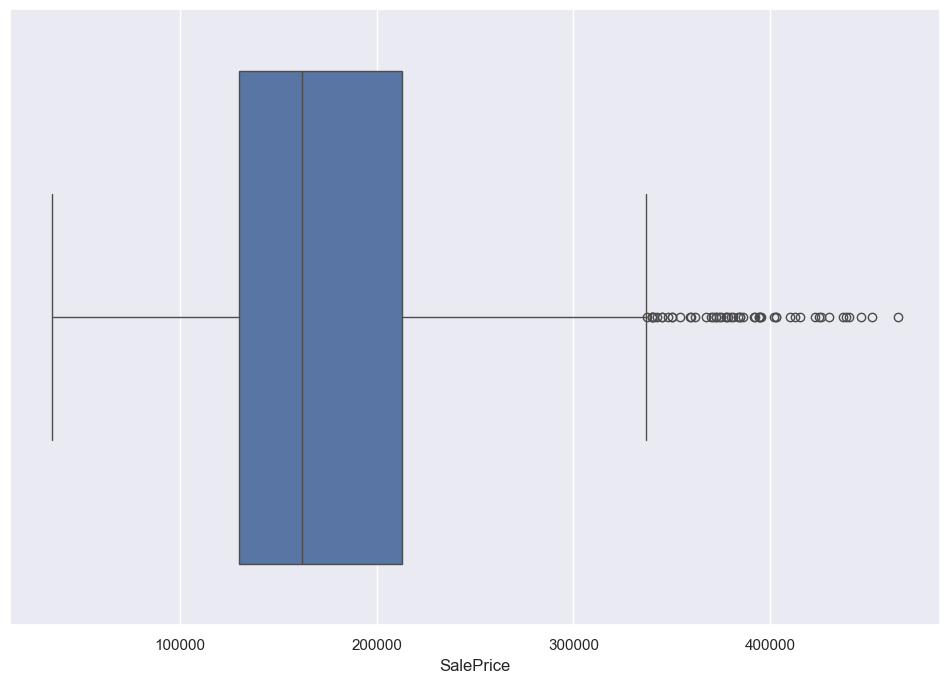

In [18]:
sns.boxplot(x=data["SalePrice"]) # Visualize SalePrice after removing outliers

### Remove irrelevant, multicollinear, and high-missing-value features

##### Features being removed:
- Poorly correlated with SalePrice
- Multicollinear features
- Features with >20% missing values

In [19]:
cols_to_remove = [
    # Features with poor correlation
    "WoodDeckSF",
    "2ndFlrSF",
    "OpenPorchSF",
    "HalfBath",
    "LotArea",
    "BsmtFullBath",
    "BsmtUnfSF",
    "BedroomAbvGr",
    "ScreenPorch",
    "PoolArea",
    "MoSold",
    "3SsnPorch",
    "BsmtFinSF2",
    "BsmtHalfBath",
    "MiscVal",
    "Id",
    "LowQualFinSF",
    "YrSold",
    "OverallCond",
    "MSSubClass",
    "EnclosedPorch",
    "KitchenAbvGr",
    
    # Multicollinear features
    "GarageArea",   # Multicollinear with GarageCars
    "1stFlrSF",     # Multicollinear with TotalBsmtSF
    "TotRmsAbvGrd", # Multicollinear with GrLivArea

    # Features with missing values > 20%
    "FireplaceQu",  # 47% missing
    "MasVnrArea",   # 59% missing
    "Fence",        # 79% missing
    "Alley",        # 94% missing
    "MiscFeature",  # 96% missing
    "PoolQC"        # 99% missing
]


In [20]:
data.drop(cols_to_remove, axis=1, inplace=True) # Drop the listed columns
test_data.drop(cols_to_remove, axis=1, inplace=True)
data.columns # View remaining columns

Index(['MSZoning', 'LotFrontage', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', 'GrLivArea', 'FullBath', 'KitchenQual', 'Functional',
       'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition',
       'SalePrice'],
      dtype='object')

In [21]:
# Check the final shape of the dataset
data.shape

(1448, 50)

In [22]:
# Identify categorical and numerical columns in train data

categorical_columns_train = data.select_dtypes(include=['object']).columns

numerical_columns_train = data.select_dtypes(exclude=['object']).columns

In [23]:
# Identify categorical and numerical columns in test data

categorical_columns_test = test_data.select_dtypes(include=['object']).columns

numerical_columns_test = test_data.select_dtypes(exclude=['object']).columns

In [24]:
# Separate categorical and numerical features
categorical_data = data[categorical_columns_train]
numerical_data = data[numerical_columns_train]

In [25]:
# Check missing values in categorical_data
missing_data = categorical_data.isnull().sum()

missing_data = missing_data[missing_data > 0]
print(missing_data)

MasVnrType      870
BsmtQual         37
BsmtCond         37
BsmtExposure     38
BsmtFinType1     37
BsmtFinType2     38
Electrical        1
GarageType       81
GarageFinish     81
GarageQual       81
GarageCond       81
dtype: int64


In [26]:
# Check missing values in numerical_data
missing_data = numerical_data.isnull().sum()

missing_data = missing_data[missing_data > 0]
print(missing_data)

LotFrontage    258
GarageYrBlt     81
dtype: int64


In [27]:
# Filling Missing Values in Categorical Data

data[categorical_columns_train] = data[categorical_columns_train].fillna("Unknown")
test_data[categorical_columns_test] = test_data[categorical_columns_test].fillna("Unknown")

# Filling Missing Values in Numerical Data

data[numerical_columns_train] = data[numerical_columns_train].fillna(data[numerical_columns_train].mean())
test_data[numerical_columns_test] = test_data[numerical_columns_test].fillna(test_data[numerical_columns_test].mean())

In [28]:
# Update categorical_data and numerical_data after filling missing values

categorical_data = data[categorical_columns_train]
numerical_data = data[numerical_columns_train]

In [29]:
# Check missing values in categorical_data
missing_data = categorical_data.isnull().sum()

missing_data = missing_data[missing_data > 0]
print(missing_data)

Series([], dtype: int64)


In [30]:
# Check missing values in updated numerical_data
missing_data = numerical_data.isnull().sum()
missing_data = missing_data[missing_data > 0]
print(missing_data)

Series([], dtype: int64)


In [31]:
# Convert Categorical Data to Numeric

train_encoded = pd.get_dummies(data, columns=categorical_columns_train, dtype=int)

test_encoded = pd.get_dummies(test_data, columns=categorical_columns_test, dtype=int)

# Align the columns of train and test_data

train_encoded, test_encoded = train_encoded.align(test_encoded, axis=1, fill_value=0)

In [32]:
train_encoded.head()

,BldgType_1Fam,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Fa,BsmtCond_Gd,BsmtCond_Po,BsmtCond_TA,BsmtCond_Unknown,...,SaleType_Unknown,SaleType_WD,Street_Grvl,Street_Pave,TotalBsmtSF,Utilities_AllPub,Utilities_NoSeWa,Utilities_Unknown,YearBuilt,YearRemodAdd
0,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,856,1,0,0,2003,2003
1,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,1262,1,0,0,1976,1976
2,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,920,1,0,0,2001,2002
3,1,0,0,0,0,0,1,0,0,0,...,0,1,0,1,756,1,0,0,1915,1970
4,1,0,0,0,0,0,0,0,1,0,...,0,1,0,1,1145,1,0,0,2000,2000


In [33]:
train_encoded.shape, test_encoded.shape

((1448, 263), (1459, 263))

In [34]:
# Define the features and target variable

X = train_encoded.drop("SalePrice", axis=1)
y = train_encoded["SalePrice"]

In [35]:
# Split the data into train and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
#Scale numerical features

numerical_features_to_scale = numerical_columns_train.drop('SalePrice')

# Scale features
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

scaler = StandardScaler()
X_train_scaled[numerical_features_to_scale] = scaler.fit_transform(X_train[numerical_features_to_scale])

X_test_scaled[numerical_features_to_scale] = scaler.transform(X_test[numerical_features_to_scale])


In [37]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


model = RandomForestRegressor(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred_rf = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred_rf)
mae = mean_absolute_error(y_test, y_pred_rf)
r2 = r2_score(y_test, y_pred_rf)

print(f"Mean Squared Error = {mse:.2f}")
print(f"Mean Absolute Error = {mae:.2f}")
print(f"R-squared = {r2:.2f}")

Mean Squared Error = 556514057.29
Mean Absolute Error = 16364.06
R-squared = 0.84


In [38]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Take the logarithm of the true and predicted values
log_y_test = np.log(y_test)
log_y_pred_rf = np.log(y_pred_rf)

# Calculate RMSE on the logarithmic scale
rmse_log = np.sqrt(mean_squared_error(log_y_test, log_y_pred_rf))

print(f"Root Mean Squared Log Error (RMSLE) = {rmse_log:.4f}")


Root Mean Squared Log Error (RMSLE) = 0.1473


# issue with test_encoded below check tomarw

In [39]:
# If 'SalePrice' is not in test data, skip dropping it
test_encoded = test_data.copy()  # Assuming 'test_data' has been preprocessed for prediction


# Predict SalePrice for test data
y_test_pred = model.predict(test_encoded)  # Replace 'model' with your best-trained model

# Create a DataFrame with 'Id' and 'SalePrice'
submission = pd.DataFrame({
    'Id': test_data['Id'],         # Assuming 'Id' column is present in your test data
    'SalePrice': y_test_pred       # Predicted values for test data
})

# Save the DataFrame to a CSV file
submission.to_csv('submission.csv', index=False)

print("Submission file saved as 'submission.csv'")


ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- BldgType
- BsmtCond
- BsmtExposure
- BsmtFinType1
- BsmtFinType2
- ...
Feature names seen at fit time, yet now missing:
- BldgType_1Fam
- BldgType_2fmCon
- BldgType_Duplex
- BldgType_Twnhs
- BldgType_TwnhsE
- ...
